In [1]:
import csv
import re
import nltk
import Sastrawi
import sklearn
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('lexicon-semua.csv')

In [15]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['Stemming'], df['Label'], test_size=0.1, random_state=0)

train_df = pd.DataFrame()
train_df['Stemming'] = x_train
train_df['Label'] = y_train
test_df = pd.DataFrame()
test_df['Stemming'] = x_test
test_df['Label'] = y_test

In [16]:
train_df

,Stemming,Label
265,"['pesan', 'makan', 'lama', 'id', 'pesan', 'lel...",positif
878,"['tgl', 'jajan', 'shopeefood', 'jajan', 'grgr'...",positif
3933,"['driver', 'shopeefood', 'foto', 'profil', 'ku...",positif
402,"['haaaa', 'shopeefood', 'mehlah', 'try']",netral
3192,"['makan', 'gratis', 'teman', 'shopeefood']",positif
...,...,...
4931,"['kirim', 'shopeefood', 'jakartakedirisemarang...",positif
3264,"['makan', 'gratis', 'teman', 'shopeefood']",positif
1653,"['makan', 'gratis', 'teman', 'shopeefood']",positif
2607,"['makan', 'gratis', 'teman', 'shopeefood']",positif


In [17]:
test_df

,Stemming,Label
4840,"['ulang', 'kali', 'baca', 'pocer', 'copipud', ...",positif
5262,"['daftar', 'shopeefood', 'daftar', 'maxim', 'd...",positif
5364,"['genap', 'vouchernya', 'makan', 'gratis', 'te...",positif
496,"['order', 'shopeefood', 'rumah', 'malem', 'ali...",positif
142,"['shopeefood', 'intraktir', 'makan', 'ortu', '...",positif
...,...,...
3220,"['makan', 'gratis', 'teman', 'shopeefood']",positif
977,"['langit', 'hujan', 'henti', 'pesan', 'shopeef...",negatif
2475,"['makan', 'gratis', 'teman', 'shopeefood']",positif
4000,"['mari', 'beli', 'makan', 'shopeefood', 'besti...",positif


In [18]:
from sklearn import svm

clf = svm.SVC(kernel='linear', probability=True)

In [19]:
clf.gamma

'scale'

In [20]:
tfidf_vectorizer=TfidfVectorizer()
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [17]:
cross_val = cross_val_score(clf,tfidf_train,y_train,cv=7 )

In [18]:
cross_val

array([0.84344147, 0.84463277, 0.85028249, 0.83898305, 0.85028249,
       0.84887006, 0.83615819])

In [21]:
clf.fit(tfidf_train, y_train)

SVC(kernel='linear', probability=True)

In [22]:
y_pred = clf.fit(tfidf_train, y_train).predict(tfidf_test)
cm = metrics.confusion_matrix(y_test, y_pred)

In [9]:
cm

array([[ 45,   6,  21],
       [  6,  53,  19],
       [  7,  13, 381]], dtype=int64)

In [13]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69        72
           1       0.90      0.95      0.93       401
           2       0.74      0.68      0.71        78

    accuracy                           0.87       551
   macro avg       0.81      0.75      0.78       551
weighted avg       0.86      0.87      0.87       551



In [11]:
clf.score(tfidf_test, y_test)

0.8693284936479129

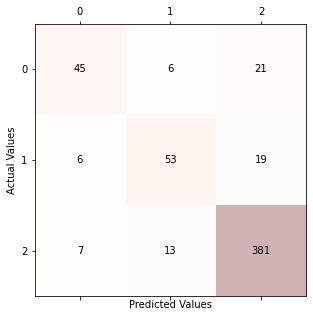

              precision    recall  f1-score   support

     negatif       0.78      0.62      0.69        72
      netral       0.74      0.68      0.71        78
     positif       0.90      0.95      0.93       401

    accuracy                           0.87       551
   macro avg       0.81      0.75      0.78       551
weighted avg       0.86      0.87      0.87       551



In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, tfidf_train, y_train, cv = 10)
rerata_akurasi_svm = sum(scores)/len(scores)
print("   Rerata akurasi           :",rerata_akurasi_svm)
print("   Rerata akurasi (round)   :",round(rerata_akurasi_svm,2))
dic1 = {"iterasi ke-":[x+1 for x in range(10)], "akurasi":scores}
pd.DataFrame.from_dict(dic1)

   Rerata akurasi           : 0.8482966764418377
   Rerata akurasi (round)   : 0.85


,iterasi ke-,akurasi
0,1,0.844758
1,2,0.826613
2,3,0.846774
3,4,0.856855
4,5,0.828629
5,6,0.887097
6,7,0.840726
7,8,0.856566
8,9,0.862626
9,10,0.832323


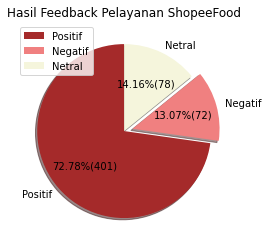

In [14]:
import matplotlib.pyplot as plt

values = [401, 72, 78]
explode = [0, 0.1, 0]
labels = ['Positif', 'Negatif', 'Netral']
colors = ['brown', 'lightcoral', 'beige']

def make_autopct(values):
    def my_autopct(pct):
        total  = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, colors=colors, labels=labels, explode=explode,
      autopct=make_autopct(values), shadow=True, startangle=90)
plt.legend()
plt.title("Hasil Feedback Pelayanan ShopeeFood")
plt.show()

In [24]:
review = 'cepat makan enak'
review_vector = tfidf_vectorizer.transform([review]) # vectorizing
print(clf.predict(review_vector))

['positif']


In [36]:
from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(tfidf_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)

ValueError: multiclass format is not supported

<Figure size 720x576 with 0 Axes>

In [3]:
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

df["Stemming"] = df["Stemming"].apply(convert_text_list)


print(df["Stemming"])

0                               [shopeefood, tip, driver]
1                                     [hujan, shopeefood]
2          [pikir, random, cheesecake, found, shopeefood]
3                                 [coba, cek, shopeefood]
4       [sok, kirim, mah, serius, serah, mau, grabfood...
                              ...                        
5503                   [makan, gratis, teman, shopeefood]
5504    [geh, daftarin, ayah, shopeefood, driver, daft...
5505               [alhamdulillah, rancaekek, shopeefood]
5506                   [makan, gratis, teman, shopeefood]
5507    [lumayan, voucher, shopeefood, tinggal, klik, ...
Name: Stemming, Length: 5508, dtype: object


In [4]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

df["TF_dict"] = df['Stemming'].apply(calc_TF)

df["TF_dict"].head()

0    {'shopeefood': 0.3333333333333333, 'tip': 0.33...
1                    {'hujan': 0.5, 'shopeefood': 0.5}
2    {'pikir': 0.2, 'random': 0.2, 'cheesecake': 0....
3    {'coba': 0.3333333333333333, 'cek': 0.33333333...
4    {'sok': 0.1, 'kirim': 0.1, 'mah': 0.1, 'serius...
Name: TF_dict, dtype: object

In [11]:
index = 1000

print('%20s' % "term", "\t", "TF\n")
for key in df["TF_dict"][index]:
    print('%20s' % key, "\t", df["TF_dict"][index][key])

                term 	 TF

              wkwkwk 	 0.25
          shopeefood 	 0.25
                 buk 	 0.25
                disc 	 0.25
